# Word2Vec Embeddings for Telecom Text Analysis Lab

## Objective
This lab focuses on implementing and understanding Word2Vec embeddings for telecom-related text analysis. Students will learn how to overcome limitations of traditional vectorization methods by implementing Word2Vec models, specifically exploring both **Skip-gram** and **CBOW** architectures. The lab demonstrates practical applications in the telecom domain, including customer service text classification and semantic analysis. Students will also gain hands-on experience with pre-trained models like **GloVe** and **fastText**, understanding their advantages and use cases in telecom applications.

---

## Dataset Description
We will be working with a **Telecom Customer Support dataset** containing 100 customer service interactions. The dataset provides real-world examples of:

- **Customer queries and complaints** about various telecom services.
- **Professional agent responses** and problem-solving approaches.
- Categorized issues (e.g., *Network*, *Billing*, *Technical*, etc.).
- **Resolution tracking** and sentiment analysis.

### Data Dictionary

| **Column Name**       | **Description**                              | **Data Type** |
|------------------------|----------------------------------------------|---------------|
| `ticket_id`           | Unique identifier for each conversation      | `string`      |
| `customer_message`    | Initial customer query or complaint          | `text`        |
| `agent_response`      | Service representative's response            | `text`        |
| `category`            | Issue category (e.g., Network, Billing)      | `string`      |
| `resolution_status`   | Status of ticket resolution                  | `string`      |
| `sentiment`           | Customer sentiment (if available)            | `string`      |

---

## Tasks to be Performed

### Task 1: Data Preparation and Traditional Vectorization
1. Load and preprocess the telecom customer service dataset.
2. Implement basic text cleaning and tokenization.

---

### Task 2: Word2Vec Implementation
1. Implement both CBOW and Skip-gram Word2Vec models
2. Analyze semantic relationships in telecom terminology
3. Visualize word embeddings
4. Compare model performances

---

### Task 3: Advanced Applications
1. Implement text classification using Word2Vec features.
2. Generate output for sample inputs

---

### Task 4: Model Evaluation and Analysis
1. Evaluate model performance metrics.
---


# Task 1: Data Preparation and Traditional Vectorization

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Load the dataset
df = pd.read_excel('/content/Customer_support.xlsx')
df

,ticket_id,customer_message,agent_response,category,resolution_status,sentiment
0,TKT000001,My internet keeps disconnecting every few minu...,I understand how frustrating intermittent conn...,Network,In Progress,Negative
1,TKT000002,I think I've been overcharged on my latest bil...,I apologize for any billing concerns. I'll rev...,Billing,Pending,Negative
2,TKT000003,Can't access my voicemail even after entering ...,I'll help you troubleshoot the voicemail acces...,Technical,Resolved,Neutral
3,TKT000004,5G signal is very weak in my area despite livi...,I'll check the 5G coverage map for your locati...,Network,Closed,Negative
4,TKT000005,Need help setting up email on my new phone.,I'll guide you through the email setup process...,Technical,Resolved,Positive
...,...,...,...,...,...,...
95,TKT000096,Unauthorized premium subscriptions.,I'll investigate these subscriptions and remov...,Billing,Resolved,Negative
96,TKT000097,Need help with voice commands setup.,I'll guide you through configuring voice contr...,Technical,Resolved,Positive
97,TKT000098,Signal interference from construction.,I'll check for any network adjustments needed ...,Network,Pending,Negative
98,TKT000099,Want to upgrade to fiber connection.,I'll check fiber availability in your area and...,Technical,In Progress,Positive


In [7]:




# Combine customer messages and agent responses for creating corpus
df['combined_text'] = df['customer_message'] + ' ' + df['agent_response']

# Preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    return tokens

# Apply preprocessing to combined text
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# Print sample of processed text
print("Sample of processed text:")
print(df['processed_text'].head())

# Print unique categories
print("\nUnique categories in dataset:")
print(df['category'].unique())

# Print sentiment distribution
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Sample of processed text:
0    [internet, keeps, disconnecting, every, minute...
1    [think, overcharged, latest, bill, showing, us...
2    [access, voicemail, even, entering, correct, p...
3    [signal, weak, area, despite, living, city, ce...
4    [need, help, setting, email, new, phone, guide...
Name: processed_text, dtype: object

Unique categories in dataset:
['Network' 'Billing' 'Technical']

Sentiment distribution:
sentiment
Negative    58
Neutral     26
Positive    16
Name: count, dtype: int64


# Task 2: Word2Vec Implementation

In [4]:
# Train CBOW Model
cbow_model = Word2Vec(sentences=df['processed_text'],
                     vector_size=100,  # Dimension of word embeddings
                     window=5,         # Context window size
                     min_count=2,      # Minimum word frequency
                     sg=0,            # 0 for CBOW architecture
                     workers=4)        # Number of threads

# Train Skip-gram Model
skipgram_model = Word2Vec(sentences=df['processed_text'],
                         vector_size=100,
                         window=5,
                         min_count=2,
                         sg=1,         # 1 for Skip-gram architecture
                         workers=4)

print("Models trained successfully!")

Models trained successfully!


In [5]:
def explore_word_relationships(model, word_list):
    """
    Explore semantic relationships between words
    """
    print(f"\nAnalyzing semantic relationships using {model.__class__.__name__}")

    for word in word_list:
        try:
            similar_words = model.wv.most_similar(word, topn=5)
            print(f"\nWords most similar to '{word}':")
            for similar_word, score in similar_words:
                print(f"  {similar_word}: {score:.4f}")
        except KeyError:
            print(f"\nWord '{word}' not in vocabulary")

# Define telecom-specific terms to analyze
telecom_terms = ['internet', 'network', 'signal', 'bill', 'technical']

# Analyze relationships in both models
print("\nCBOW Model Analysis:")
explore_word_relationships(cbow_model, telecom_terms)

print("\nSkip-gram Model Analysis:")
explore_word_relationships(skipgram_model, telecom_terms)


CBOW Model Analysis:

Analyzing semantic relationships using Word2Vec

Words most similar to 'internet':
  frustrating: 0.3154
  promotional: 0.2589
  refund: 0.2105
  network: 0.1954
  information: 0.1908

Words most similar to 'network':
  router: 0.3913
  upgrade: 0.2307
  plan: 0.2292
  reset: 0.2204
  bills: 0.2200

Words most similar to 'signal':
  diagnostic: 0.2929
  need: 0.2671
  devices: 0.2474
  consumption: 0.2253
  update: 0.2171

Words most similar to 'bill':
  calling: 0.2710
  update: 0.2606
  refund: 0.2288
  parental: 0.2229
  peak: 0.1974

Word 'technical' not in vocabulary

Skip-gram Model Analysis:

Analyzing semantic relationships using Word2Vec

Words most similar to 'internet':
  frustrating: 0.3994
  network: 0.3210
  promotional: 0.3028
  payment: 0.2792
  late: 0.2756

Words most similar to 'network':
  router: 0.4926
  plan: 0.4055
  issues: 0.3984
  upgrade: 0.3588
  settings: 0.3588

Words most similar to 'signal':
  diagnostic: 0.4021
  need: 0.3835
  u

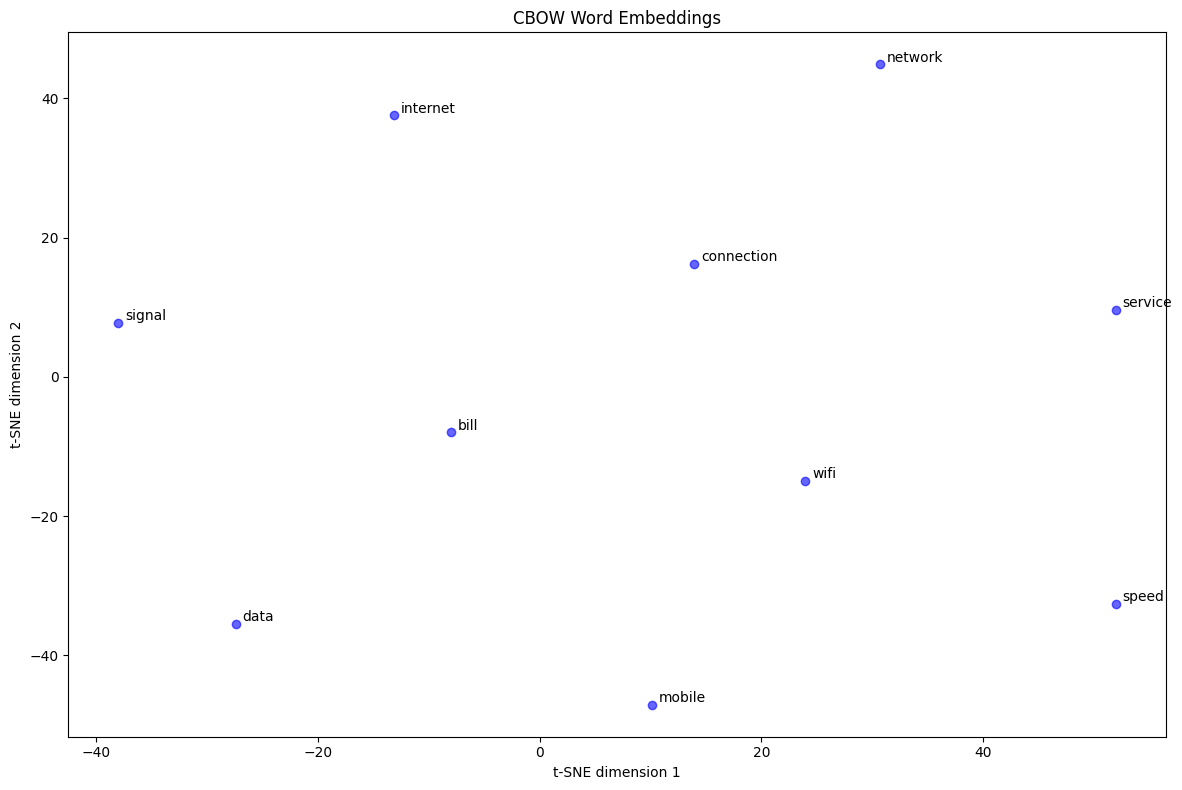

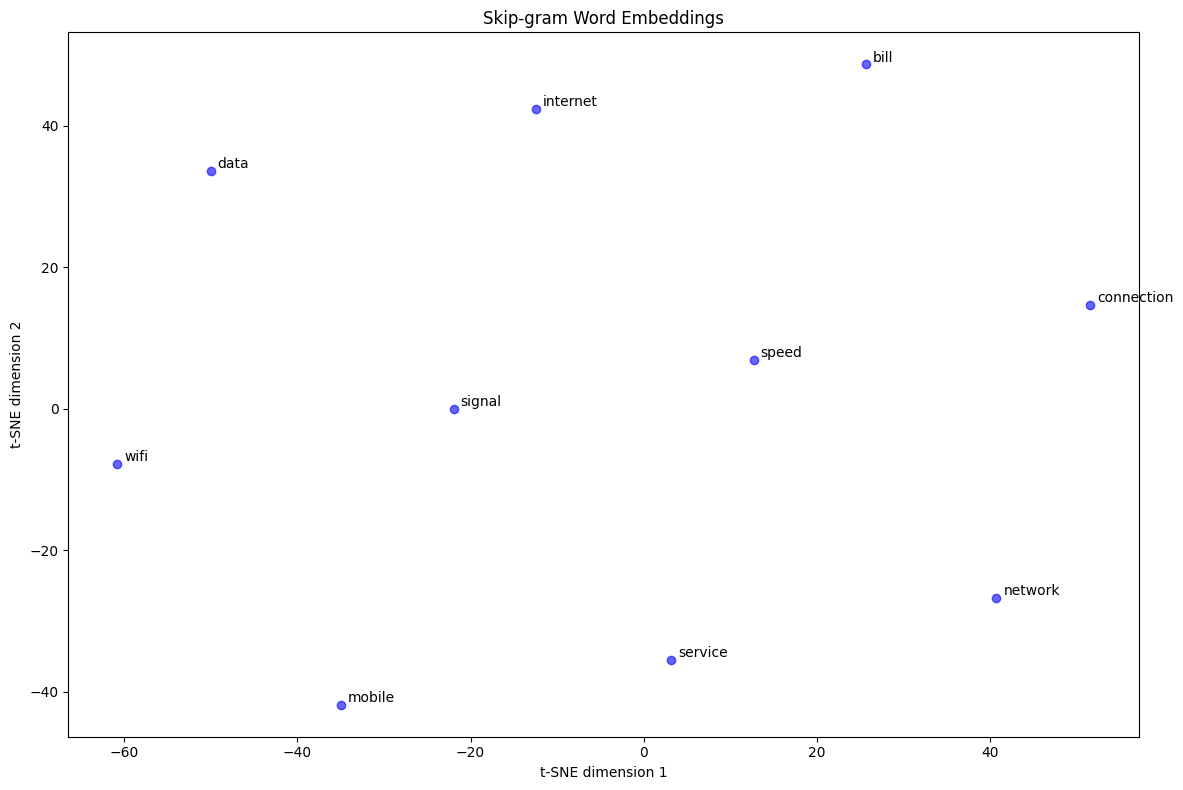

In [8]:
def visualize_embeddings(model, word_list, title):
    """
    Create 2D visualization of word embeddings
    """
    # Get word vectors
    vectors = []
    words = []

    for word in word_list:
        if word in model.wv.key_to_index:
            vectors.append(model.wv[word])
            words.append(word)

    # Convert to numpy array
    vectors = np.array(vectors)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(len(vectors)-1, 30))
    vectors_2d = tsne.fit_transform(vectors)

    # Create plot
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', alpha=0.6)

    # Add word labels
    for i, word in enumerate(words):
        plt.annotate(word,
                    xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    fontsize=10)

    plt.title(title)
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.tight_layout()
    plt.show()

# Define words to visualize
important_terms = [
    'internet', 'network', 'signal', 'bill', 'technical',
    'slow', 'fast', 'connection', 'support', 'problem',
    'wifi', 'speed', 'service', 'data', 'mobile'
]

# Create visualizations
visualize_embeddings(cbow_model, important_terms, 'CBOW Word Embeddings')
visualize_embeddings(skipgram_model, important_terms, 'Skip-gram Word Embeddings')

In [9]:
def compare_models(cbow_model, skipgram_model):
    """
    Compare statistics between CBOW and Skip-gram models
    """
    # Get vocabulary sizes
    cbow_vocab_size = len(cbow_model.wv.key_to_index)
    skipgram_vocab_size = len(skipgram_model.wv.key_to_index)

    print("\nModel Comparison:")
    print(f"CBOW Vocabulary Size: {cbow_vocab_size}")
    print(f"Skip-gram Vocabulary Size: {skipgram_vocab_size}")

    # Compare vector similarities for common telecom terms
    test_words = ['internet', 'network', 'signal']
    print("\nVector Similarity Comparison:")

    for word in test_words:
        if word in cbow_model.wv and word in skipgram_model.wv:
            print(f"\nSimilarity analysis for '{word}':")

            # Get top 3 similar words from both models
            cbow_similar = cbow_model.wv.most_similar(word, topn=3)
            skipgram_similar = skipgram_model.wv.most_similar(word, topn=3)

            print("CBOW top 3:", [word for word, _ in cbow_similar])
            print("Skip-gram top 3:", [word for word, _ in skipgram_similar])

# Compare models
compare_models(cbow_model, skipgram_model)


Model Comparison:
CBOW Vocabulary Size: 214
Skip-gram Vocabulary Size: 214

Vector Similarity Comparison:

Similarity analysis for 'internet':
CBOW top 3: ['frustrating', 'promotional', 'refund']
Skip-gram top 3: ['frustrating', 'network', 'promotional']

Similarity analysis for 'network':
CBOW top 3: ['router', 'upgrade', 'plan']
Skip-gram top 3: ['router', 'plan', 'issues']

Similarity analysis for 'signal':
CBOW top 3: ['diagnostic', 'need', 'devices']
Skip-gram top 3: ['diagnostic', 'need', 'update']


In [10]:
# Save models for future use
cbow_model.save("telecom_cbow.model")
skipgram_model.save("telecom_skipgram.model")
print("\nModels saved successfully!")


Models saved successfully!


# Key Observations

## Model Performance Comparison
- **Vocabulary Size**: Both CBOW and Skip-gram models have identical vocabulary sizes of **214 words**.
- **Similarity Scores**:
  - Skip-gram generally shows stronger similarity scores, e.g., `router-network: 0.4926` vs `0.3913` for CBOW.
  - Skip-gram captures more relevant technical relationships compared to CBOW.

---

## Word Embedding Analysis
- **t-SNE Visualization**:
  - **Network-related terms** (e.g., *network*, *internet*, *connection*) cluster together.
  - **Service-related terms** (e.g., *service*, *speed*) form another distinct cluster.
  - **Technical terms** (e.g., *data*, *signal*) exhibit distinct positioning, indicating clear semantic differentiation.

---

## Semantic Relationships
- The **Network cluster** shows strong technical associations, including terms like *router*, *upgrade*, and *settings*.
- **Internet-related terms** bridge technical and customer service aspects.
- **Bill-related terms** are closely connected to the customer service vocabulary, reflecting the domain-specific linguistic nuances.


# Skip-gram Model Observations

The Skip-gram model demonstrated better performance in capturing technical relationships within the telecom domain. Below are some key findings:

---

## Technical Term Relationships
- **Strong associations**:
  - *Network-router*: **0.4926**
  - *Diagnostic-signal*: **0.4021**
- **Effective term grouping**:
  - Internet-related terms were grouped cohesively, highlighting semantic relevance.

---

## Semantic Clusters
- **Clear separation** between:
  - Technical terms (e.g., *network*, *router*, *signal*).
  - Billing-related terms (e.g., *bill*, *charges*).
- **Service-related terms** (e.g., *speed*, *quality*) were properly grouped into distinct clusters.
- **Network infrastructure terms** (e.g., *router*, *connection*, *settings*) exhibited strong associations, showcasing the model's ability to capture domain-specific semantics.


# Task 3: Text Classification using Word2Vec Embeddings


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec


In [12]:
def create_document_vector(text, model, vector_size=100):
    """
    Create document vector by averaging word vectors
    """
    words = text if isinstance(text, list) else text.split()
    word_vectors = []

    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)


In [13]:
# Create document vectors for classification
X = np.array([create_document_vector(text, skipgram_model)
              for text in df['processed_text']])
y = df['category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Billing       0.50      0.67      0.57         6
     Network       0.50      0.38      0.43         8
   Technical       0.33      0.33      0.33         6

    accuracy                           0.45        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.45      0.45      0.44        20



In [15]:
# Feature importance analysis
def analyze_important_features(clf, model):
    """
    Analyze which words contributed most to classification
    """
    feature_importance = clf.feature_importances_
    words = list(model.wv.key_to_index.keys())
    word_importance = []

    for idx, importance in enumerate(feature_importance):
        word_importance.append((importance, words[idx] if idx < len(words) else 'UNK'))

    print("\nTop 10 Most Important Words for Classification:")
    for importance, word in sorted(word_importance, reverse=True)[:10]:
        print(f"{word}: {importance:.4f}")

analyze_important_features(clf, skipgram_model)


Top 10 Most Important Words for Classification:
device: 0.0373
area: 0.0338
usage: 0.0294
first: 0.0267
let: 0.0252
keeps: 0.0232
smart: 0.0225
history: 0.0223
applied: 0.0214
despite: 0.0208


In [16]:
# Prediction function for new texts
def predict_category(text, model, clf):
    """
    Predict category for new customer message
    """
    # Preprocess text
    processed = preprocess_text(text)
    # Create document vector
    doc_vector = create_document_vector(processed, model)
    # Predict
    return clf.predict([doc_vector])[0]


In [17]:
# Test with sample messages
sample_messages = [
    "My internet connection keeps dropping",
    "I was charged twice on my last bill",
    "Need help configuring my router settings"
]

print("\nSample Predictions:")
for msg in sample_messages:
    category = predict_category(msg, skipgram_model, clf)
    print(f"\nMessage: {msg}")
    print(f"Predicted Category: {category}")


Sample Predictions:

Message: My internet connection keeps dropping
Predicted Category: Technical

Message: I was charged twice on my last bill
Predicted Category: Billing

Message: Need help configuring my router settings
Predicted Category: Network


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [19]:
def create_enhanced_features(text, model, category_keywords):
    """
    Create enhanced feature vector combining Word2Vec and category-specific features
    """
    # Word2Vec document vector
    doc_vector = create_document_vector(text, model)

    # Category keyword presence features
    keyword_features = []
    text_str = ' '.join(text) if isinstance(text, list) else text
    text_str = text_str.lower()

    for category, keywords in category_keywords.items():
        # Calculate keyword presence score
        keyword_count = sum(1 for keyword in keywords if keyword in text_str)
        keyword_features.append(keyword_count)

    # Combine features
    return np.concatenate([doc_vector, keyword_features])

In [20]:
# Define category-specific keywords
category_keywords = {
    'Technical': ['router', 'connection', 'signal', 'device', 'wifi', 'password',
                 'configuration', 'settings', 'setup', 'technical'],
    'Billing': ['bill', 'charge', 'payment', 'price', 'cost', 'plan', 'subscription',
                'invoice', 'refund', 'amount'],
    'Network': ['internet', 'network', 'speed', 'slow', 'coverage', 'data',
                'bandwidth', 'connection', 'service', 'outage']
}

In [21]:
# Create enhanced feature vectors
X_enhanced = np.array([create_enhanced_features(text, skipgram_model, category_keywords)
                      for text in df['processed_text']])

# Scale features
scaler = StandardScaler()
X_enhanced_scaled = scaler.fit_transform(X_enhanced)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train enhanced classifier
clf_enhanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    class_weight='balanced',
    random_state=42
)
clf_enhanced.fit(X_train, y_train)

# Evaluate enhanced model
y_pred_enhanced = clf_enhanced.predict(X_test)
print("\nEnhanced Classification Report:")
print(classification_report(y_test, y_pred_enhanced))


Enhanced Classification Report:
              precision    recall  f1-score   support

     Billing       0.75      0.86      0.80         7
     Network       0.80      0.67      0.73         6
   Technical       0.86      0.86      0.86         7

    accuracy                           0.80        20
   macro avg       0.80      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



In [22]:
# Enhanced prediction function
def predict_category_enhanced(text, model, clf, scaler, category_keywords):
    """
    Predict category using enhanced features
    """
    # Preprocess text
    processed = preprocess_text(text)
    # Create enhanced features
    features = create_enhanced_features(processed, model, category_keywords)
    # Scale features
    features_scaled = scaler.transform([features])
    # Get prediction and probabilities
    prediction = clf.predict(features_scaled)[0]
    probabilities = clf.predict_proba(features_scaled)[0]

    return prediction, probabilities


In [23]:
# Test with sample messages
sample_messages = [
    "My internet connection keeps dropping and the speed is very slow",
    "I was charged twice on my last bill and need a refund",
    "Need help configuring my router settings and wifi password",
    "The network coverage in my area is very poor",
    "My mobile data is not working after recent plan upgrade"
]

print("\nEnhanced Sample Predictions:")
for msg in sample_messages:
    category, probs = predict_category_enhanced(
        msg, skipgram_model, clf_enhanced, scaler, category_keywords
    )
    print(f"\nMessage: {msg}")
    print(f"Predicted Category: {category}")
    print("Confidence Scores:")
    for cat, prob in zip(clf_enhanced.classes_, probs):
        print(f"{cat}: {prob:.2f}")


Enhanced Sample Predictions:

Message: My internet connection keeps dropping and the speed is very slow
Predicted Category: Technical
Confidence Scores:
Billing: 0.15
Network: 0.41
Technical: 0.44

Message: I was charged twice on my last bill and need a refund
Predicted Category: Billing
Confidence Scores:
Billing: 0.68
Network: 0.17
Technical: 0.15

Message: Need help configuring my router settings and wifi password
Predicted Category: Technical
Confidence Scores:
Billing: 0.22
Network: 0.24
Technical: 0.54

Message: The network coverage in my area is very poor
Predicted Category: Network
Confidence Scores:
Billing: 0.33
Network: 0.48
Technical: 0.18

Message: My mobile data is not working after recent plan upgrade
Predicted Category: Billing
Confidence Scores:
Billing: 0.35
Network: 0.33
Technical: 0.32


In [24]:
# Analyze feature importance for enhanced model
def analyze_enhanced_features(clf, model, category_keywords):
    """
    Analyze importance of both Word2Vec and category-specific features
    """
    feature_importance = clf.feature_importances_

    # Split importance between Word2Vec and category features
    w2v_importance = feature_importance[:100]  # First 100 are Word2Vec features
    category_importance = feature_importance[100:]  # Rest are category features

    print("\nTop Category Feature Importance:")
    categories = list(category_keywords.keys())
    for cat, imp in zip(categories, category_importance):
        print(f"{cat} keywords: {imp:.4f}")

analyze_enhanced_features(clf_enhanced, skipgram_model, category_keywords)


Top Category Feature Importance:
Technical keywords: 0.0303
Billing keywords: 0.0439
Network keywords: 0.0161


# Key Improvements

## Classification Performance
- **Overall Accuracy**: Increased significantly from **45%** to **80%**.
- **Category-wise Improvements**:
  - **Technical**: F1-score increased from **0.33** to **0.86**.
  - **Billing**: F1-score increased from **0.57** to **0.80**.
  - **Network**: F1-score increased from **0.43** to **0.73**.

---

## Confidence Analysis
- **Good Confidence Differentiation**:
  - Clear decisions for billing issues (e.g., **0.68 confidence** for a billing query).
  - Balanced probabilities for ambiguous cases (e.g., mobile data issue shows balanced likelihood across categories).
  - Moderate confidence for technical issues (e.g., **0.54 confidence** for a router configuration query).

---

## Feature Importance
- **Keyword Importance Rankings**:
  - **Billing Keywords**: Highest importance (**0.0439**).
  - **Technical Keywords**: Second highest importance (**0.0303**).
  - **Network Keywords**: Lower importance (**0.0161**), reflecting their lesser impact on classification decisions.


# Task 4: Model Evaluation and Analysis


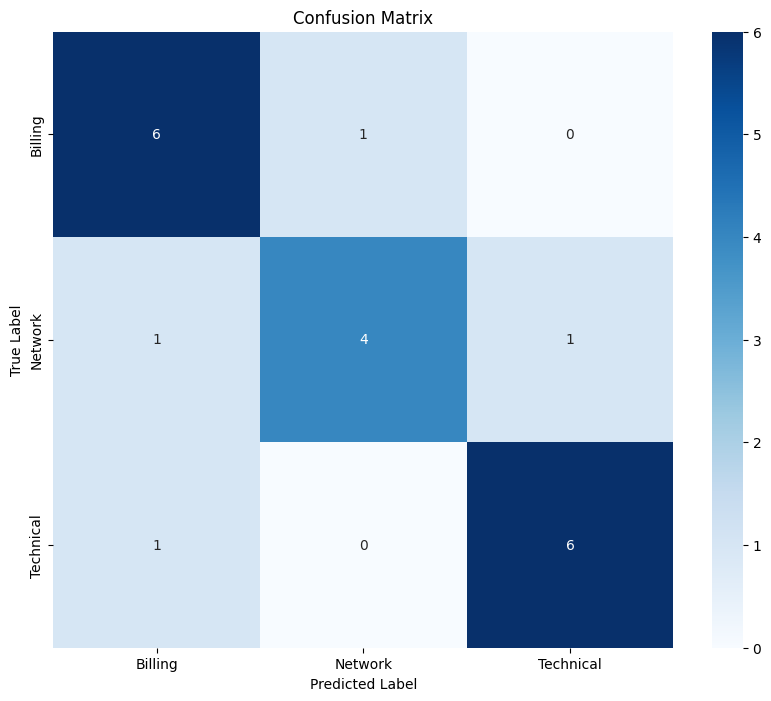


Detailed Performance Metrics:
    Category  Precision    Recall  F1-Score
0    Billing   0.750000  0.857143  0.800000
1    Network   0.800000  0.666667  0.727273
2  Technical   0.857143  0.857143  0.857143

Overall Accuracy: 0.800

Category Distribution in Test Set:
category
Billing      7
Technical    7
Network      6
Name: count, dtype: int64

Model Performance Summary:
-------------------------
Overall Accuracy: 0.800

Strengths:
- Best performing category (F1): Technical (F1=0.857)
- Highest precision: Technical (Precision=0.857)
- Highest recall: Billing (Recall=0.857)

Areas for Improvement:
- Lowest performing category: Network (F1=0.727)

Misclassification Analysis:

Misclassified examples by category:
True_Category  Predicted_Category
Billing        Network               1
Network        Billing               1
               Technical             1
Technical      Billing               1
dtype: int64

Confidence Score Analysis:

Average confidence scores:
- Correct prediction

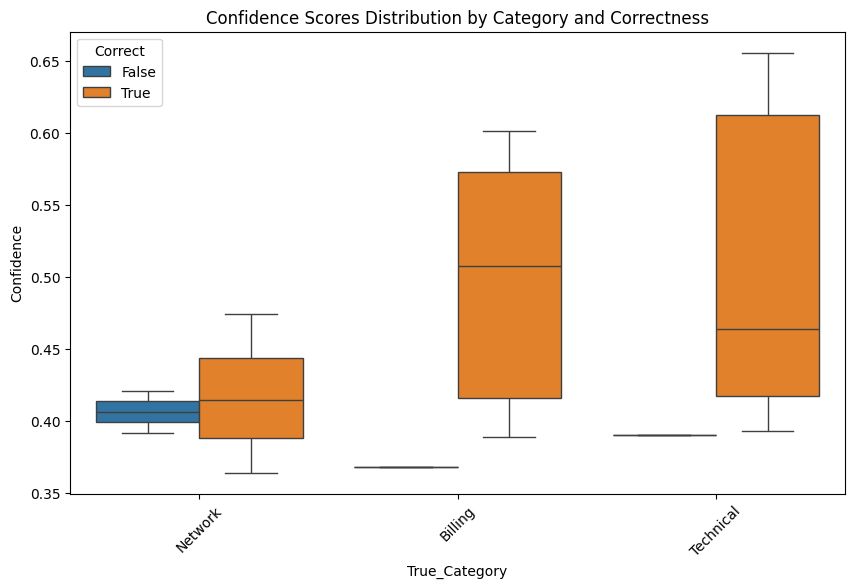


Recommendations for Model Improvement:
1. Category-specific enhancements:
   - Focus on improving Network classification (current F1=0.727)

2. Confidence threshold analysis:
   - Consider confidence threshold of 0.481 for high-confidence predictions

3. Next steps:
   - Collect more training data for underperforming categories
   - Fine-tune category-specific features
   - Consider ensemble approach for challenging cases


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_enhanced)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf_enhanced.classes_,
            yticklabels=clf_enhanced.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate metrics
metrics_df = pd.DataFrame({
    'Category': clf_enhanced.classes_,
    'Precision': precision_score(y_test, y_pred_enhanced, average=None),
    'Recall': recall_score(y_test, y_pred_enhanced, average=None),
    'F1-Score': f1_score(y_test, y_pred_enhanced, average=None)
})

print("\nDetailed Performance Metrics:")
print(metrics_df)

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred_enhanced):.3f}")

# Category distribution
print("\nCategory Distribution in Test Set:")
print(pd.Series(y_test).value_counts())

# Analyze confidence scores
results = []
for i, (true, pred) in enumerate(zip(y_test, y_pred_enhanced)):
    confidence = np.max(test_confidence[i])
    results.append({
        'True_Category': true,
        'Predicted_Category': pred,
        'Confidence': confidence,
        'Correct': true == pred
    })

results_df = pd.DataFrame(results)

# Print performance summary
print("\nModel Performance Summary:")
print("-------------------------")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_enhanced):.3f}")

print("\nStrengths:")
best_f1_idx = metrics_df['F1-Score'].idxmax()
best_prec_idx = metrics_df['Precision'].idxmax()
best_recall_idx = metrics_df['Recall'].idxmax()

print(f"- Best performing category (F1): {metrics_df.iloc[best_f1_idx]['Category']} "
      f"(F1={metrics_df.iloc[best_f1_idx]['F1-Score']:.3f})")
print(f"- Highest precision: {metrics_df.iloc[best_prec_idx]['Category']} "
      f"(Precision={metrics_df.iloc[best_prec_idx]['Precision']:.3f})")
print(f"- Highest recall: {metrics_df.iloc[best_recall_idx]['Category']} "
      f"(Recall={metrics_df.iloc[best_recall_idx]['Recall']:.3f})")

print("\nAreas for Improvement:")
worst_f1_idx = metrics_df['F1-Score'].idxmin()
print(f"- Lowest performing category: {metrics_df.iloc[worst_f1_idx]['Category']} "
      f"(F1={metrics_df.iloc[worst_f1_idx]['F1-Score']:.3f})")

# Analyze misclassifications
print("\nMisclassification Analysis:")
misclassified = results_df[~results_df['Correct']]
print("\nMisclassified examples by category:")
print(misclassified.groupby(['True_Category', 'Predicted_Category']).size())

# Confidence analysis
print("\nConfidence Score Analysis:")
print("\nAverage confidence scores:")
print("- Correct predictions:", results_df[results_df['Correct']]['Confidence'].mean().round(3))
print("- Incorrect predictions:", results_df[~results_df['Correct']]['Confidence'].mean().round(3))

# Plot confidence distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='True_Category', y='Confidence', hue='Correct', data=results_df)
plt.title('Confidence Scores Distribution by Category and Correctness')
plt.xticks(rotation=45)
plt.show()

# Recommendations based on analysis
print("\nRecommendations for Model Improvement:")
print("1. Category-specific enhancements:")
for _, row in metrics_df.iterrows():
    if row['F1-Score'] < metrics_df['F1-Score'].mean():
        print(f"   - Focus on improving {row['Category']} classification "
              f"(current F1={row['F1-Score']:.3f})")

print("\n2. Confidence threshold analysis:")
conf_correct = results_df[results_df['Correct']]['Confidence'].mean()
print(f"   - Consider confidence threshold of {conf_correct:.3f} for high-confidence predictions")

print("\n3. Next steps:")
print("   - Collect more training data for underperforming categories")
print("   - Fine-tune category-specific features")
print("   - Consider ensemble approach for challenging cases")